In [1]:
import psycopg2
import pandas as pd
import numpy as np

"""
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999
"""

pd.options.display.max_columns = 999

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_19061/4289042536.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Show installed versions

In [2]:
pd.__version__

'2.2.0'

In [3]:
pd.show_versions()

/Users/jiricerny/_Git/_venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit                : fd3f57170aa1af588ba877e8e28c158a20a4886d
python                : 3.11.8.final.0
python-bits           : 64
OS                    : Darwin
OS-release            : 23.5.0
Version               : Darwin Kernel Version 23.5.0: Wed May  1 20:12:58 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6000
machine               : arm64
processor             : arm
byteorder             : little
LC_ALL                : None
LANG                  : cs_CZ.UTF-8
LOCALE                : cs_CZ.UTF-8

pandas                : 2.2.0
numpy                 : 1.26.4
pytz                  : 2024.1
dateutil              : 2.8.2
setuptools            : 65.5.0
pip                   : 24.0
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : None
html5lib              : None
pymysql

In [4]:
from importlib.metadata import version
print('pandas:', version('pandas'))
print('numpy:', version('numpy'))
print('psycopg2:', version('psycopg2-binary')) #version('psycopg2')
print('matplotlib:', version('matplotlib'))

pandas: 2.2.0
numpy: 1.26.4
psycopg2: 2.9.9
matplotlib: 3.8.2


# 2. Create an example DataFrame

In [5]:
df = pd.DataFrame({'col one':[100, 200], 'col two':[300, 400]})
df

col one  col two
0      100      300
1      200      400

In [6]:
np.random.rand(4, 8)

array([[5.66759527e-01, 9.58044046e-01, 6.19093690e-01, 3.63160362e-02,
        8.16908525e-01, 3.95022309e-01, 7.26720361e-02, 8.22507005e-01],
       [2.11656345e-01, 5.11524798e-03, 8.18467667e-01, 1.78981885e-01,
        8.83133848e-01, 5.07664677e-01, 7.41708431e-01, 1.64124013e-01],
       [6.32536162e-02, 2.06535973e-01, 5.51123335e-01, 8.03458693e-01,
        4.86249085e-01, 8.69055421e-01, 7.36704581e-02, 4.23124456e-01],
       [8.19111885e-01, 4.88498628e-04, 2.84980471e-01, 6.66240513e-01,
        3.20051461e-02, 6.32340249e-01, 9.25238002e-01, 7.87516384e-01]])

In [7]:
pd.DataFrame(np.random.rand(4, 8))

0         1         2         3         4         5         6  \
0  0.853397  0.013071  0.035685  0.513120  0.995116  0.602123  0.156343   
1  0.008746  0.184521  0.507398  0.466584  0.766211  0.592061  0.099981   
2  0.293932  0.539209  0.689516  0.697185  0.886853  0.518908  0.743954   
3  0.006326  0.884775  0.863872  0.062760  0.812550  0.457527  0.049344   

          7  
0  0.420408  
1  0.727415  
2  0.855039  
3  0.575282

In [8]:
list('abcdefgh')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [9]:
pd.DataFrame(np.random.rand(4, 8), columns = list('abcdefgh'))

a         b         c         d         e         f         g  \
0  0.604198  0.667933  0.965010  0.111955  0.023249  0.838324  0.992273   
1  0.726838  0.596326  0.192427  0.230670  0.098683  0.204586  0.205444   
2  0.899841  0.072042  0.163024  0.493049  0.385363  0.366205  0.434191   
3  0.902414  0.449591  0.965365  0.698082  0.198913  0.528203  0.889933   

          h  
0  0.580620  
1  0.121867  
2  0.231515  
3  0.945166

# 3. Rename columns

In [10]:
df.columns

Index(['col one', 'col two'], dtype='object')

In [11]:
df = df.rename({'col one':'col_one','col two':'col_two'}, axis = 'columns')
df

col_one  col_two
0      100      300
1      200      400

In [12]:
df.col_one

0    100
1    200
Name: col_one, dtype: int64

In [13]:
df.columns = ['col one', 'col two']
df

col one  col two
0      100      300
1      200      400

In [14]:
df.columns.str.capitalize()

Index(['Col one', 'Col two'], dtype='object')

In [15]:
df.columns = df.columns.str.replace(' ', '_')
df

col_one  col_two
0      100      300
1      200      400

In [16]:
df.columns = df.columns.str.capitalize()
df

Col_one  Col_two
0      100      300
1      200      400

In [17]:
df.add_prefix('X_')

X_Col_one  X_Col_two
0        100        300
1        200        400

In [18]:
df.add_suffix('_Y')

Col_one_Y  Col_two_Y
0        100        300
1        200        400

In [19]:
df

Col_one  Col_two
0      100      300
1      200      400

In [20]:
df = df.add_prefix('X_')
df = df.add_suffix('_Y')
df

X_Col_one_Y  X_Col_two_Y
0          100          300
1          200          400

# 4. Reverse row order

In [21]:
#drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks = pd.read_csv('data/drinks.csv')
drinks

country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2                             0.7         Africa  
3                            12.4         Europe  
4                             5.9         Africa  
..                            ...            ...  
188                           7.7  South America  
189                           2.0           Asia  
190                           0.1           Asia  
191                           2.5         Africa  
192                           4.7         Africa  

[193 rows x 6 columns]

In [22]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa

In [23]:
drinks.loc[::-1].head()

country  beer_servings  spirit_servings  wine_servings  \
192   Zimbabwe             64               18              4   
191     Zambia             32               19              4   
190      Yemen              6                0              0   
189    Vietnam            111                2              1   
188  Venezuela            333              100              3   

     total_litres_of_pure_alcohol      continent  
192                           4.7         Africa  
191                           2.5         Africa  
190                           0.1           Asia  
189                           2.0           Asia  
188                           7.7  South America

In [24]:
drinks.loc[::-1].reset_index(drop=True).head()

country  beer_servings  spirit_servings  wine_servings  \
0   Zimbabwe             64               18              4   
1     Zambia             32               19              4   
2      Yemen              6                0              0   
3    Vietnam            111                2              1   
4  Venezuela            333              100              3   

   total_litres_of_pure_alcohol      continent  
0                           4.7         Africa  
1                           2.5         Africa  
2                           0.1           Asia  
3                           2.0           Asia  
4                           7.7  South America

# 5. Reverse column order

In [25]:
drinks.loc[:, ::-1].head()

continent  total_litres_of_pure_alcohol  wine_servings  spirit_servings  \
0      Asia                           0.0              0                0   
1    Europe                           4.9             54              132   
2    Africa                           0.7             14                0   
3    Europe                          12.4            312              138   
4    Africa                           5.9             45               57   

   beer_servings      country  
0              0  Afghanistan  
1             89      Albania  
2             25      Algeria  
3            245      Andorra  
4            217       Angola

# 6. Select columns by data type

In [26]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [27]:
drinks.select_dtypes(include = 'number').head()

beer_servings  spirit_servings  wine_servings  total_litres_of_pure_alcohol
0              0                0              0                           0.0
1             89              132             54                           4.9
2             25                0             14                           0.7
3            245              138            312                          12.4
4            217               57             45                           5.9

In [28]:
drinks.select_dtypes(include = 'object').head()

country continent
0  Afghanistan      Asia
1      Albania    Europe
2      Algeria    Africa
3      Andorra    Europe
4       Angola    Africa

In [29]:
drinks.select_dtypes(include = 'category').head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [30]:
drinks.select_dtypes(include = ['number', 'object', 'category', 'datetime']).head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa

In [31]:
drinks.select_dtypes(exclude = 'object').head()

beer_servings  spirit_servings  wine_servings  total_litres_of_pure_alcohol
0              0                0              0                           0.0
1             89              132             54                           4.9
2             25                0             14                           0.7
3            245              138            312                          12.4
4            217               57             45                           5.9

In [32]:
drinks.select_dtypes(exclude = ['number', 'category']).head()

country continent
0  Afghanistan      Asia
1      Albania    Europe
2      Algeria    Africa
3      Andorra    Europe
4       Angola    Africa

# 7 Covert strings to numbers

In [33]:
df = pd.DataFrame({'col_one':['1.1','2.2','3.3'],
                  'col_two':['4.4','5.5','6.6'],
                  'col_three':['7.7','8.8','-'],})
df

col_one col_two col_three
0     1.1     4.4       7.7
1     2.2     5.5       8.8
2     3.3     6.6         -

In [34]:
df.dtypes

col_one      object
col_two      object
col_three    object
dtype: object

In [35]:
df.astype({'col_one':'float','col_two':'float'})

col_one  col_two col_three
0      1.1      4.4       7.7
1      2.2      5.5       8.8
2      3.3      6.6         -

In [36]:
df.astype({'col_three':'float'})

ValueError: could not convert string to float: '-': Error while type casting for column 'col_three'

In [37]:
pd.to_numeric(df.col_three, errors='coerce')

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

In [38]:
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

In [39]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

col_one  col_two  col_three
0      1.1      4.4        7.7
1      2.2      5.5        8.8
2      3.3      6.6        0.0

In [40]:
df.dtypes

col_one      float64
col_two      float64
col_three    float64
dtype: object

# 8. Reduce DataFrame size

In [41]:
#drinks = pd.read_csv('data/drinks.csv')
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [42]:
cols = ['beer_servings', 'continent']
small_drinks = pd.read_csv('data/drinks.csv', usecols = cols)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   beer_servings  193 non-null    int64 
 1   continent      193 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.7 KB


In [43]:
dtypes = {'continent':'category'}
small_drinks = pd.read_csv('data/drinks.csv', usecols=cols, dtype=dtypes)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   beer_servings  193 non-null    int64   
 1   continent      193 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.4 KB


In [44]:
small_drinks

beer_servings      continent
0                0           Asia
1               89         Europe
2               25         Africa
3              245         Europe
4              217         Africa
..             ...            ...
188            333  South America
189            111           Asia
190              6           Asia
191             32         Africa
192             64         Africa

[193 rows x 2 columns]

# 9. Build a dataFrame from multiple files (row-wise)

In [45]:
pd.read_csv('data/stocks_3.csv')

Date   Close    Volume Symbol
0  2016-10-05   57.64  16726400   MSFT
1  2016-10-05   31.59  11808600   CSCO
2  2016-10-05  113.05  21453100   AAPL

In [46]:
from glob import glob

In [47]:
stock_files = sorted(glob('data/stocks_*.csv'))
stock_files

['data/stocks_1.csv', 'data/stocks_2.csv', 'data/stocks_3.csv']

In [48]:
pd.concat((pd.read_csv(file) for file in stock_files))

Date   Close    Volume Symbol
0  2016-10-03   31.50  14070500   CSCO
1  2016-10-03  112.52  21701800   AAPL
2  2016-10-03   57.42  19189500   MSFT
0  2016-10-04  113.00  29736800   AAPL
1  2016-10-04   57.24  20085900   MSFT
2  2016-10-04   31.35  18460400   CSCO
0  2016-10-05   57.64  16726400   MSFT
1  2016-10-05   31.59  11808600   CSCO
2  2016-10-05  113.05  21453100   AAPL

In [49]:
pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)

Date   Close    Volume Symbol
0  2016-10-03   31.50  14070500   CSCO
1  2016-10-03  112.52  21701800   AAPL
2  2016-10-03   57.42  19189500   MSFT
3  2016-10-04  113.00  29736800   AAPL
4  2016-10-04   57.24  20085900   MSFT
5  2016-10-04   31.35  18460400   CSCO
6  2016-10-05   57.64  16726400   MSFT
7  2016-10-05   31.59  11808600   CSCO
8  2016-10-05  113.05  21453100   AAPL

# 10. Build a dataFrame from multiple files (column-wise)

In [50]:
pd.read_csv('data/drinks_1.csv')

country  beer_servings  spirit_servings
0    Afghanistan              0                0
1        Albania             89              132
2        Algeria             25                0
3        Andorra            245              138
4         Angola            217               57
..           ...            ...              ...
188    Venezuela            333              100
189      Vietnam            111                2
190        Yemen              6                0
191       Zambia             32               19
192     Zimbabwe             64               18

[193 rows x 3 columns]

In [51]:
pd.read_csv('data/drinks_2.csv')

wine_servings  total_litres_of_pure_alcohol      continent
0                0                           0.0           Asia
1               54                           4.9         Europe
2               14                           0.7         Africa
3              312                          12.4         Europe
4               45                           5.9         Africa
..             ...                           ...            ...
188              3                           7.7  South America
189              1                           2.0           Asia
190              0                           0.1           Asia
191              4                           2.5         Africa
192              4                           4.7         Africa

[193 rows x 3 columns]

In [52]:
from glob import glob

In [53]:
drink_files = sorted(glob('data/drinks_*.csv'))
drink_files

['data/drinks_1.csv', 'data/drinks_2.csv']

In [54]:
pd.concat((pd.read_csv(file) for file in drink_files), axis = 'columns')

country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2                             0.7         Africa  
3                            12.4         Europe  
4                             5.9         Africa  
..                            ...            ...  
188                           7.7  South America  
189                           2.0           Asia  
190                           0.1           Asia  
191                           2.5         Africa  
192                           4.7         Africa  

[193 rows x 6 columns]

# 11. Create a DataFrame from the clipboard

In [55]:
pd.read_clipboard()

Empty DataFrame
Columns: [tips_and_tricks]
Index: []

# 12. Split a DataFrame into two random subsets

In [56]:
movies = pd.read_csv('data/imdb_1000.csv')
movies

star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   
3            PG-13     Action       152   
4                R      Crime       154   
..             ...        ...       ...   
974             PG     Comedy       116   
975             PG  Adventure       118   
976          PG-13     Action       138   
977             PG     Horror       114   
978              R      Crime       126   

                                           actors_list  
0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....  
..                                                 ...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
975  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  
977  [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...  
978  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...  

[979 rows x 6 columns]

In [57]:
len(movies)

979

In [58]:
movies1 = drinks.sample(frac = 0.75, random_state=1234)

In [59]:
# index must be unique!!!
movies2 = movies.drop(movies1.index)

In [60]:
len(movies1)

145

In [61]:
len(movies2)

834

In [62]:
movies1.index.sort_values()

Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       182, 183, 184, 185, 186, 187, 188, 190, 191, 192],
      dtype='int64', length=145)

In [63]:
movies2.index.sort_values()

Index([  2,   3,  13,  14,  19,  23,  26,  30,  34,  37,
       ...
       969, 970, 971, 972, 973, 974, 975, 976, 977, 978],
      dtype='int64', length=834)

In [64]:
# check unique index
movies[movies.index.duplicated()]

Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []

# 13. Filter a DataFrame by multiple categories

In [65]:
movies = pd.read_csv('data/imdb_1000.csv')
movies

star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   
3            PG-13     Action       152   
4                R      Crime       154   
..             ...        ...       ...   
974             PG     Comedy       116   
975             PG  Adventure       118   
976          PG-13     Action       138   
977             PG     Horror       114   
978              R      Crime       126   

                                           actors_list  
0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....  
..                                                 ...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
975  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  
977  [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...  
978  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...  

[979 rows x 6 columns]

In [66]:
movies.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....

In [67]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [68]:
movies[(movies.genre == 'Action') | (movies.genre == 'Drama') | (movies.genre == 'Western')]

star_rating                                            title  \
3            9.0                                  The Dark Knight   
5            8.9                                     12 Angry Men   
6            8.9                   The Good, the Bad and the Ugly   
9            8.9                                       Fight Club   
11           8.8                                        Inception   
..           ...                                              ...   
968          7.4                              The English Patient   
970          7.4                                      Wonder Boys   
972          7.4                                   Blue Valentine   
973          7.4                            The Cider House Rules   
976          7.4  Master and Commander: The Far Side of the World   

    content_rating    genre  duration  \
3            PG-13   Action       152   
5        NOT RATED    Drama        96   
6        NOT RATED  Western       161   
9                R    Drama       139   
11           PG-13   Action       148   
..             ...      ...       ...   
968              R    Drama       162   
970              R    Drama       107   
972          NC-17    Drama       112   
973          PG-13    Drama       126   
976          PG-13   Action       138   

                                           actors_list  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
5    [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...  
6    [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...  
9    [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...  
11   [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...  
..                                                 ...  
968  [u'Ralph Fiennes', u'Juliette Binoche', u'Will...  
970  [u'Michael Douglas', u'Tobey Maguire', u'Franc...  
972  [u'Ryan Gosling', u'Michelle Williams', u'John...  
973  [u'Tobey Maguire', u'Charlize Theron', u'Micha...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  

[423 rows x 6 columns]

In [69]:
movies[movies.genre.isin(['Action', 'Drama', 'Western'])]

star_rating                                            title  \
3            9.0                                  The Dark Knight   
5            8.9                                     12 Angry Men   
6            8.9                   The Good, the Bad and the Ugly   
9            8.9                                       Fight Club   
11           8.8                                        Inception   
..           ...                                              ...   
968          7.4                              The English Patient   
970          7.4                                      Wonder Boys   
972          7.4                                   Blue Valentine   
973          7.4                            The Cider House Rules   
976          7.4  Master and Commander: The Far Side of the World   

    content_rating    genre  duration  \
3            PG-13   Action       152   
5        NOT RATED    Drama        96   
6        NOT RATED  Western       161   
9                R    Drama       139   
11           PG-13   Action       148   
..             ...      ...       ...   
968              R    Drama       162   
970              R    Drama       107   
972          NC-17    Drama       112   
973          PG-13    Drama       126   
976          PG-13   Action       138   

                                           actors_list  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
5    [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...  
6    [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...  
9    [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...  
11   [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...  
..                                                 ...  
968  [u'Ralph Fiennes', u'Juliette Binoche', u'Will...  
970  [u'Michael Douglas', u'Tobey Maguire', u'Franc...  
972  [u'Ryan Gosling', u'Michelle Williams', u'John...  
973  [u'Tobey Maguire', u'Charlize Theron', u'Micha...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  

[423 rows x 6 columns]

In [70]:
movies[~movies.genre.isin(['Action', 'Drama', 'Western'])]

star_rating                                          title  \
0            9.3                       The Shawshank Redemption   
1            9.2                                  The Godfather   
2            9.1                         The Godfather: Part II   
4            8.9                                   Pulp Fiction   
7            8.9  The Lord of the Rings: The Return of the King   
..           ...                                            ...   
971          7.4                             Death at a Funeral   
974          7.4                                        Tootsie   
975          7.4                    Back to the Future Part III   
977          7.4                                    Poltergeist   
978          7.4                                    Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   
4                R      Crime       154   
7            PG-13  Adventure       201   
..             ...        ...       ...   
971              R     Comedy        90   
974             PG     Comedy       116   
975             PG  Adventure       118   
977             PG     Horror       114   
978              R      Crime       126   

                                           actors_list  
0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....  
7    [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...  
..                                                 ...  
971  [u'Matthew Macfadyen', u'Peter Dinklage', u'Ew...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
975  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  
977  [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...  
978  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...  

[556 rows x 6 columns]

# 14. Filter a DataFrame by largest categories

In [71]:
counts = movies.genre.value_counts()
counts

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64

In [72]:
counts.nlargest(3)

genre
Drama     278
Comedy    156
Action    136
Name: count, dtype: int64

In [73]:
counts.nlargest(3).index

Index(['Drama', 'Comedy', 'Action'], dtype='object', name='genre')

In [74]:
movies[movies.genre.isin(counts.nlargest(3).index)]

star_rating                                            title  \
3            9.0                                  The Dark Knight   
5            8.9                                     12 Angry Men   
9            8.9                                       Fight Club   
11           8.8                                        Inception   
12           8.8   Star Wars: Episode V - The Empire Strikes Back   
..           ...                                              ...   
971          7.4                               Death at a Funeral   
972          7.4                                   Blue Valentine   
973          7.4                            The Cider House Rules   
974          7.4                                          Tootsie   
976          7.4  Master and Commander: The Far Side of the World   

    content_rating   genre  duration  \
3            PG-13  Action       152   
5        NOT RATED   Drama        96   
9                R   Drama       139   
11           PG-13  Action       148   
12              PG  Action       124   
..             ...     ...       ...   
971              R  Comedy        90   
972          NC-17   Drama       112   
973          PG-13   Drama       126   
974             PG  Comedy       116   
976          PG-13  Action       138   

                                           actors_list  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
5    [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...  
9    [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...  
11   [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...  
12   [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...  
..                                                 ...  
971  [u'Matthew Macfadyen', u'Peter Dinklage', u'Ew...  
972  [u'Ryan Gosling', u'Michelle Williams', u'John...  
973  [u'Tobey Maguire', u'Charlize Theron', u'Micha...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  

[570 rows x 6 columns]

# 15. Handle missing values

In [75]:
ufo = pd.read_csv('data/ufo.csv')
ufo

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
18236            Grant Park             NaN       TRIANGLE    IL   
18237           Spirit Lake             NaN           DISK    IA   
18238           Eagle River             NaN            NaN    WI   
18239           Eagle River             RED          LIGHT    WI   
18240                  Ybor             NaN           OVAL    FL   

                   Time  
0        6/1/1930 22:00  
1       6/30/1930 20:00  
2       2/15/1931 14:00  
3        6/1/1931 13:00  
4       4/18/1933 19:00  
...                 ...  
18236  12/31/2000 23:00  
18237  12/31/2000 23:00  
18238  12/31/2000 23:45  
18239  12/31/2000 23:45  
18240  12/31/2000 23:59  

[18241 rows x 5 columns]

In [76]:
ufo.isna()

City  Colors Reported  Shape Reported  State   Time
0      False             True           False  False  False
1      False             True           False  False  False
2      False             True           False  False  False
3      False             True           False  False  False
4      False             True           False  False  False
...      ...              ...             ...    ...    ...
18236  False             True           False  False  False
18237  False             True           False  False  False
18238  False             True            True  False  False
18239  False            False           False  False  False
18240  False             True           False  False  False

[18241 rows x 5 columns]

In [77]:
ufo.isna().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [78]:
ufo.isna().mean()

City               0.001425
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

In [79]:
ufo.dropna()

City Colors Reported Shape Reported State              Time
12           Belton             RED         SPHERE    SC   6/30/1939 20:00
19       Bering Sea             RED          OTHER    AK   4/30/1943 23:00
36       Portsmouth             RED      FORMATION    VA    7/10/1945 1:30
44        Blairsden           GREEN         SPHERE    CA   6/30/1946 19:00
82         San Jose            BLUE        CHEVRON    CA   7/15/1947 21:00
...             ...             ...            ...   ...               ...
18213      Pasadena           GREEN       FIREBALL    CA  12/28/2000 19:10
18216  Garden Grove          ORANGE          LIGHT    CA  12/29/2000 16:10
18220   Shasta Lake            BLUE           DISK    CA  12/29/2000 20:30
18233     Anchorage             RED        VARIOUS    AK  12/31/2000 21:00
18239   Eagle River             RED          LIGHT    WI  12/31/2000 23:45

[2486 rows x 5 columns]

In [80]:
ufo.dropna(axis = 'columns')

State              Time
0        NY    6/1/1930 22:00
1        NJ   6/30/1930 20:00
2        CO   2/15/1931 14:00
3        KS    6/1/1931 13:00
4        NY   4/18/1933 19:00
...     ...               ...
18236    IL  12/31/2000 23:00
18237    IA  12/31/2000 23:00
18238    WI  12/31/2000 23:45
18239    WI  12/31/2000 23:45
18240    FL  12/31/2000 23:59

[18241 rows x 2 columns]

In [81]:
# dropni sloupce kde je více než 90 % chybějících záznamů
ufo.dropna(thresh=len(ufo)*0.9 , axis = 'columns')

City State              Time
0                    Ithaca    NY    6/1/1930 22:00
1               Willingboro    NJ   6/30/1930 20:00
2                   Holyoke    CO   2/15/1931 14:00
3                   Abilene    KS    6/1/1931 13:00
4      New York Worlds Fair    NY   4/18/1933 19:00
...                     ...   ...               ...
18236            Grant Park    IL  12/31/2000 23:00
18237           Spirit Lake    IA  12/31/2000 23:00
18238           Eagle River    WI  12/31/2000 23:45
18239           Eagle River    WI  12/31/2000 23:45
18240                  Ybor    FL  12/31/2000 23:59

[18241 rows x 3 columns]

In [82]:
#procenta:
#ufo.dropna(thresh=len(ufo)*0.9 , axis = 'columns').isna().sum()/len(ufo)
ufo.isna().sum()/len(ufo)

City               0.001425
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

# 16. Split a string into multiple columns

In [83]:
df = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                  'location':['Los Angeles, CA', 'Washington, DC']})
df

name         location
0  John Arthur Doe  Los Angeles, CA
1   Jane Ann Smith   Washington, DC

In [84]:
df.name.str.split()

0    [John, Arthur, Doe]
1     [Jane, Ann, Smith]
Name: name, dtype: object

In [85]:
df.name.str.split(' ', expand = True)

0       1      2
0  John  Arthur    Doe
1  Jane     Ann  Smith

In [86]:
df[['first', 'middle', 'last']] = df.name.str.split(' ', expand = True)
df

name         location first  middle   last
0  John Arthur Doe  Los Angeles, CA  John  Arthur    Doe
1   Jane Ann Smith   Washington, DC  Jane     Ann  Smith

In [87]:
df.location.str.split(', ', expand = True)

0   1
0  Los Angeles  CA
1   Washington  DC

In [88]:
df['city'] = df.location.str.split(', ', expand = True)[0]
df

name         location first  middle   last         city
0  John Arthur Doe  Los Angeles, CA  John  Arthur    Doe  Los Angeles
1   Jane Ann Smith   Washington, DC  Jane     Ann  Smith   Washington

# 17. Expand a Series of lists into a DataFrame

In [89]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

col_one   col_two
0       a  [10, 40]
1       b  [20, 50]
2       c  [30, 60]

In [90]:
df_new = df.col_two.apply(pd.Series)
df_new

0   1
0  10  40
1  20  50
2  30  60

In [91]:
pd.concat([df, df_new])

col_one   col_two     0     1
0       a  [10, 40]   NaN   NaN
1       b  [20, 50]   NaN   NaN
2       c  [30, 60]   NaN   NaN
0     NaN       NaN  10.0  40.0
1     NaN       NaN  20.0  50.0
2     NaN       NaN  30.0  60.0

In [92]:
pd.concat([df, df_new], axis = 'columns')

col_one   col_two   0   1
0       a  [10, 40]  10  40
1       b  [20, 50]  20  50
2       c  [30, 60]  30  60

In [93]:
pd.concat([df.col_one, df_new], axis = 'columns')

col_one   0   1
0       a  10  40
1       b  20  50
2       c  30  60

# 18. Aggregate by multiple functions

In [94]:
orders = pd.read_csv('data/chipotle.tsv', delimiter='\t')
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   
2                                               [Apple]     $3.39   
3                                                   NaN     $2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
...                                                 ...        ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...    $11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...    $11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...    $11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...     $8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75   

[4622 rows x 5 columns]

In [95]:
orders.rename({'item_price':'item_price_old'}, axis='columns', inplace=True)
orders['item_price'] = pd.to_numeric(orders['item_price_old'].replace({'\$': '', '\ ': ''}, regex=True), errors='coerce')
orders['item_price_old'] = orders['item_price_old'].replace({'\$': '', '\ ': ''}, regex=True)
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price_old  \
0                                                   NaN           2.39   
1                                          [Clementine]           3.39   
2                                               [Apple]           3.39   
3                                                   NaN           2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...          16.98   
...                                                 ...            ...   
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...          11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...          11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...          11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...           8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...           8.75   

      item_price  
0           2.39  
1           3.39  
2           3.39  
3           2.39  
4          16.98  
...          ...  
4617       11.75  
4618       11.75  
4619       11.25  
4620        8.75  
4621        8.75  

[4622 rows x 6 columns]

In [96]:
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price_old         object
item_price            float64
dtype: object

In [97]:
# mezera se nahradila OK
orders.loc[0, 'item_price_old']

'2.39'

In [98]:
orders[orders.order_id == 1].item_price.sum()

11.56

In [99]:
orders.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [100]:
orders.groupby('order_id').item_price.agg(['sum', 'count'])

sum  count
order_id              
1         11.56      4
2         16.98      1
3         12.67      2
4         21.00      2
5         13.70      2
...         ...    ...
1830      23.00      2
1831      12.90      3
1832      13.20      2
1833      23.50      2
1834      28.75      3

[1834 rows x 2 columns]

In [101]:
orders.groupby('order_id').item_price_old.agg(['count', ', '.join])

count                    join
order_id                               
1             4  2.39, 3.39, 3.39, 2.39
2             1                   16.98
3             2             10.98, 1.69
4             2             11.75, 9.25
5             2              9.25, 4.45
...         ...                     ...
1830          2            11.75, 11.25
1831          3        9.25, 2.15, 1.50
1832          2              8.75, 4.45
1833          2            11.75, 11.75
1834          3       11.25, 8.75, 8.75

[1834 rows x 2 columns]

In [102]:
pd.concat([orders.groupby('order_id').item_price.agg(['sum', 'count']), orders.groupby('order_id').item_price_old.agg(['count', ', '.join])], axis='columns')

sum  count  count                    join
order_id                                             
1         11.56      4      4  2.39, 3.39, 3.39, 2.39
2         16.98      1      1                   16.98
3         12.67      2      2             10.98, 1.69
4         21.00      2      2             11.75, 9.25
5         13.70      2      2              9.25, 4.45
...         ...    ...    ...                     ...
1830      23.00      2      2            11.75, 11.25
1831      12.90      3      3        9.25, 2.15, 1.50
1832      13.20      2      2              8.75, 4.45
1833      23.50      2      2            11.75, 11.75
1834      28.75      3      3       11.25, 8.75, 8.75

[1834 rows x 4 columns]

# 19. Combine the output of an aggregation with a DataFrame

In [103]:
orders = pd.read_csv('data/chipotle.tsv', delimiter='\t')
orders['item_price'] = pd.to_numeric(orders['item_price'].str.replace('$', '').str.replace(' ', ''), errors='coerce')
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]        3.39  
2                                               [Apple]        3.39  
3                                                   NaN        2.39  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
...                                                 ...         ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75  
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75  
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25  
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75  

[4622 rows x 5 columns]

In [104]:
orders.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [105]:
len(orders.groupby('order_id').item_price.sum())

1834

In [106]:
len(orders.item_price)

4622

In [107]:
total_order_price = orders.groupby('order_id').item_price.transform('sum')
total_order_price

0       11.56
1       11.56
2       11.56
3       11.56
4       16.98
        ...  
4617    23.50
4618    23.50
4619    28.75
4620    28.75
4621    28.75
Name: item_price, Length: 4622, dtype: float64

In [108]:
orders['total_order_price'] = total_order_price
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  \
0                                                   NaN        2.39   
1                                          [Clementine]        3.39   
2                                               [Apple]        3.39   
3                                                   NaN        2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98   
...                                                 ...         ...   
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75   

      total_order_price  
0                 11.56  
1                 11.56  
2                 11.56  
3                 11.56  
4                 16.98  
...                 ...  
4617              23.50  
4618              23.50  
4619              28.75  
4620              28.75  
4621              28.75  

[4622 rows x 6 columns]

In [109]:
orders['pct_of_total_order_price'] = orders.item_price / orders.total_order_price
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  \
0                                                   NaN        2.39   
1                                          [Clementine]        3.39   
2                                               [Apple]        3.39   
3                                                   NaN        2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98   
...                                                 ...         ...   
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75   

      total_order_price  pct_of_total_order_price  
0                 11.56                  0.206747  
1                 11.56                  0.293253  
2                 11.56                  0.293253  
3                 11.56                  0.206747  
4                 16.98                  1.000000  
...                 ...                       ...  
4617              23.50                  0.500000  
4618              23.50                  0.500000  
4619              28.75                  0.391304  
4620              28.75                  0.304348  
4621              28.75                  0.304348  

[4622 rows x 7 columns]

# 20. Select a slice of rows and columns

In [110]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [111]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object

In [112]:
titanic.describe()

PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare    Survived  
count  1308.000000  891.000000  
mean     33.295479    0.383838  
std      51.758668    0.486592  
min       0.000000    0.000000  
25%       7.895800    0.000000  
50%      14.454200    0.000000  
75%      31.275000    1.000000  
max     512.329200    1.000000

In [113]:
titanic.describe().loc['min':'max']

PassengerId  Pclass    Age  SibSp  Parch      Fare  Survived
min          1.0     1.0   0.17    0.0    0.0    0.0000       0.0
25%        328.0     2.0  21.00    0.0    0.0    7.8958       0.0
50%        655.0     3.0  28.00    0.0    0.0   14.4542       0.0
75%        982.0     3.0  39.00    1.0    0.0   31.2750       1.0
max       1309.0     3.0  80.00    8.0    9.0  512.3292       1.0

In [114]:
titanic.describe().loc['min':'max', 'Pclass':'Parch']

Pclass    Age  SibSp  Parch
min     1.0   0.17    0.0    0.0
25%     2.0  21.00    0.0    0.0
50%     3.0  28.00    0.0    0.0
75%     3.0  39.00    1.0    0.0
max     3.0  80.00    8.0    9.0

In [115]:
titanic.Pclass.value_counts().sort_index()/len(titanic.Pclass)

Pclass
1    0.246753
2    0.211612
3    0.541635
Name: count, dtype: float64

# 21. Reshape a MultiIndexed Series

In [116]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [117]:
titanic.Survived.mean()

0.3838383838383838

In [118]:
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [119]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [120]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: title={'center': 'Titanic - Probability of survival'}, xlabel='Sex'>

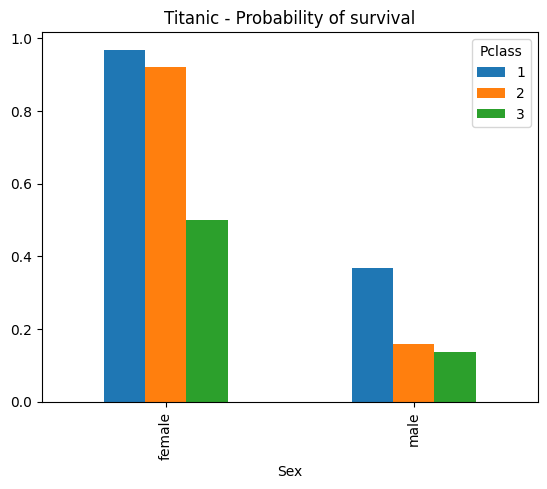

In [121]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack().plot(kind = 'bar', title = 'Titanic - Probability of survival')

# 22. Create a pivot table

In [122]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [123]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [124]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean', margins=True)

Pclass         1         2         3       All
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

In [125]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count', margins=True)

Pclass    1    2    3  All
Sex                       
female   94   76  144  314
male    122  108  347  577
All     216  184  491  891

# 23. Convert continuous data into categorical data

In [126]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [127]:
titanic.Age.head(10)

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

In [128]:
titanic['Age_cat'] = pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult'])
titanic.Age_cat

0             adult
1             adult
2             adult
3             adult
4       young adult
           ...     
1304          adult
1305    young adult
1306            NaN
1307          adult
1308          adult
Name: Age_cat, Length: 1309, dtype: category
Categories (3, object): ['child' < 'young adult' < 'adult']

In [129]:
titanic.Age_cat.describe()

count      1046
unique        3
top       adult
freq        603
Name: Age_cat, dtype: object

In [130]:
titanic.Age_cat.value_counts()

Age_cat
adult          603
young adult    250
child          193
Name: count, dtype: int64

In [131]:
titanic.pivot_table(index=['Sex', 'Age_cat'], columns='Pclass', values='Survived', aggfunc='mean', margins=True)

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_18851/1784454319.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index=['Sex', 'Age_cat'], columns='Pclass', values='Survived', aggfunc='mean', margins=True)


Pclass                     1         2         3       All
Sex    Age_cat                                            
female child        0.909091  1.000000  0.511628  0.676471
       young adult  0.941176  0.933333  0.500000  0.759259
       adult        0.982456  0.888889  0.378378  0.791367
male   child        0.800000  0.600000  0.215686  0.338028
       young adult  0.333333  0.047619  0.115385  0.120370
       adult        0.379310  0.079365  0.145161  0.204380
All                 0.655914  0.479769  0.239437  0.406162

# 24. Change display options

In [132]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [133]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [134]:
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket  Fare Cabin Embarked  Survived  
0       male 34.50      0      0      330911  7.83   NaN        Q       NaN  
1     female 47.00      1      0      363272  7.00   NaN        S       NaN  
2       male 62.00      0      0      240276  9.69   NaN        Q       NaN  
3       male 27.00      0      0      315154  8.66   NaN        S       NaN  
4     female 22.00      1      1     3101298 12.29   NaN        S       NaN  
...      ...   ...    ...    ...         ...   ...   ...      ...       ...  
1304    male 27.00      0      0      211536 13.00   NaN        S      0.00  
1305  female 19.00      0      0      112053 30.00   B42        S      1.00  
1306  female   NaN      1      2  W./C. 6607 23.45   NaN        S      0.00  
1307    male 26.00      0      0      111369 30.00  C148        C      1.00  
1308    male 32.00      0      0      370376  7.75   NaN        Q      0.00  

[1309 rows x 12 columns]

In [135]:
pd.reset_option('display.float_format')

In [136]:
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

# 25. Style a DataFrame

In [137]:
stocks = pd.read_csv('data/stocks.csv')
stocks

Date   Close    Volume Symbol
0  2016-10-03   31.50  14070500   CSCO
1  2016-10-03  112.52  21701800   AAPL
2  2016-10-03   57.42  19189500   MSFT
3  2016-10-04  113.00  29736800   AAPL
4  2016-10-04   57.24  20085900   MSFT
5  2016-10-04   31.35  18460400   CSCO
6  2016-10-05   57.64  16726400   MSFT
7  2016-10-05   31.59  11808600   CSCO
8  2016-10-05  113.05  21453100   AAPL

In [138]:
stocks.dtypes

Date       object
Close     float64
Volume      int64
Symbol     object
dtype: object

In [139]:
#df['Mycol'] = pd.to_datetime(df['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
#pd.to_datetime('2018-10-26 12:00:00.0000000011', format='%Y-%m-%d %H:%M:%S.%f')
#"%f" will parse all the way up to nanoseconds.
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Symbol            object
dtype: object

In [140]:
# formát datumu nelze dát na object
format_dict = {'Date':'{:%m/%d/%y}', 'Close':'${:.2f}', 'Volume':'{:,}'}

In [141]:
stocks.style.format(format_dict)

In [142]:
(stocks.style.format(format_dict)
 .hide() #.hide_index()
 .highlight_min('Close', color='salmon') #'red'
 .highlight_max('Close', color='lightgreen')
)

In [143]:
(stocks.style.format(format_dict)
 .hide() #.hide_index()
 .background_gradient(subset='Volume', cmap='Blues')
)

In [144]:
(stocks.style.format(format_dict)
 .hide() #.hide_index()
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Stock Prices from October 2016')
)

In [145]:
stocks

Date   Close    Volume Symbol
0 2016-10-03   31.50  14070500   CSCO
1 2016-10-03  112.52  21701800   AAPL
2 2016-10-03   57.42  19189500   MSFT
3 2016-10-04  113.00  29736800   AAPL
4 2016-10-04   57.24  20085900   MSFT
5 2016-10-04   31.35  18460400   CSCO
6 2016-10-05   57.64  16726400   MSFT
7 2016-10-05   31.59  11808600   CSCO
8 2016-10-05  113.05  21453100   AAPL

# Bonus. Profile a DataFrame

In [146]:
from glob import glob
titanic_files = sorted(glob('data/titanic*.csv'))
titanic = pd.concat((pd.read_csv(file) for file in titanic_files), ignore_index=True)
titanic

PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1     female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2       male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3       male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4     female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
...      ...   ...    ...    ...         ...      ...   ...      ...       ...  
1304    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
1305  female  19.0      0      0      112053  30.0000   B42        S       1.0  
1306  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
1307    male  26.0      0      0      111369  30.0000  C148        C       1.0  
1308    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

!pip install ydata-profiling

In [150]:
#pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(titanic, title="Profiling Report")
#profile.to_notebook_iframe()

In [151]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]